In [4]:
import pysubgroup as ps
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = make_classification(n_samples = 10000, n_features = 10, n_informative = 3,n_redundant = 0,random_state = 44,flip_y=0.1,hypercube=False,weights = [0.4])
df = pd.DataFrame(data[0],data[1],columns=['n1','n2','n3','n4','i1','i2','n5','n6','n7','i3']).reset_index()
df['target'] = df['index']

df = df.drop(columns=['index'])
lr.fit(df[df.columns.values[:10]],df.target)

list(zip(lr.coef_[0],df.columns.values[:10]))
df_coef = pd.DataFrame(list(zip(lr.coef_[0],df.columns.values[:10])),columns=['importance','feature'])
qfs = [ps.ChiSquaredQF(), ps.SimpleBinomialQF(), ps.StandardQF(0.1), ps.WRAccQF()]
qfs_names = ['ChiSquaredQF', 'SimpleBinomialQF', 'StandardQF', 'WRAccQF']
zip_qf = list(zip(qfs,qfs_names))
df['treat'] = 0

df['treat'] = df.sort_values(by='target').treat[3500:8500] + 1
df = df.fillna(0)

df['z'] = df['target'] * df['treat'] + (1-df['target'])*(1-df['treat'])
dfs = {}

for qf,qf_name in zip_qf:
    target = ps.BinaryTarget('z',target_value = True)
    searchspace = ps.create_selectors(df, ignore=['target','treat','z'])
    task = ps.SubgroupDiscoveryTask (df, target, searchspace, result_set_size=10, depth=3, qf=qf)
    result = ps.BeamSearch().execute(task)
    dfs[qf_name]=result.to_dataframe()
    
plt.figure(figsize=(4, 6))
sns.barplot(x = 'var', y = 'val', data = im)

plt.figure(figsize=(3, 5))
#sns.barplot(x = [1,0],y=tar_c1)
#sns.barplot(x = [1,0],y=tre_c1)
sns.barplot(x = [1,0],y=z_c1)

dfs['ChiSquaredQF'].description[1]
tar_c1 = df[(df['i1'] < -1.003) & (df['i3'] > 0.7343)   & (df['n4'] > 0.257) & (df['n4'] < 0.834)].target.value_counts()
tre_c1 = df[(df['i1'] < -1.003) & (df['i3'] > 0.7343)   & (df['n4'] > 0.257) & (df['n4'] < 0.834)].treat.value_counts()
z_c1 = df[(df['i1'] < -1.003) & (df['i3'] > 0.7343)   & (df['n4'] > 0.257) & (df['n4'] < 0.834)].z.value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x = 'feature',y='importance',data= df_coef)

In [ ]:
import pysubgroup as ps
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
data = make_classification(n_samples = 10000, n_features = 10, n_informative = 3,n_redundant = 0,random_state = 44,flip_y=0.1,hypercube=False,weights = [0.4])

In [6]:
df = pd.DataFrame(data[0],data[1],columns=['n1','n2','n3','n4','i1','i2','n5','n6','n7','i3']).reset_index()

In [7]:
df['target'] = df['index']

In [8]:
df = df.drop(columns=['index'])

In [9]:
df[df.columns.values[:10]].head(2)

,n1,n2,n3,n4,i1,i2,n5,n6,n7,i3
0,-0.703726,-0.809165,-0.739760,0.111968,0.115273,-0.553120,-1.287483,0.197926,1.039557,-1.442043
1,-0.033772,0.166070,0.908588,0.055271,-0.941396,-0.184525,-1.885084,-1.604474,0.943206,-0.077075


In [10]:
df.target.value_counts()

1    5886
0    4114
Name: target, dtype: int64

In [11]:
lr = LogisticRegression()

In [12]:
lr.fit(df[df.columns.values[:10]],df.target)

D:\Home\sholodnickiy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
list(zip(lr.coef_[0],df.columns.values[:10]))

[(-0.04840107110697249, 'n1'),
 (0.006052107477139708, 'n2'),
 (-0.022388322527346374, 'n3'),
 (0.007123847050145876, 'n4'),
 (-0.16988291992801494, 'i1'),
 (0.9797690943110967, 'i2'),
 (-0.0037125903236670094, 'n5'),
 (0.01192759620702905, 'n6'),
 (-0.021721251183391726, 'n7'),
 (-0.28274994182503527, 'i3')]

In [11]:
df_coef = pd.DataFrame(list(zip(lr.coef_[0],df.columns.values[:10])),columns=['importance','feature'])

In [12]:
sum(np.abs(df_coef.drop(index=[4,5,9]).importance))

0.12132678587569223

In [13]:
sum(np.abs(df_coef.drop(index=[0,1,2,3,6,7,8]).importance))

1.4324019560641468

In [14]:
val = [0.12,1.43]
var = ['non_imp','imp']
list(zip(val,var))

[(0.12, 'non_imp'), (1.43, 'imp')]

In [15]:
im = pd.DataFrame(list(zip(val,var)),columns = ['val','var'])

In [14]:
qfs = [ps.ChiSquaredQF(), ps.SimpleBinomialQF(), ps.StandardQF(0.1), ps.WRAccQF()]
qfs_names = ['ChiSquaredQF', 'SimpleBinomialQF', 'StandardQF', 'WRAccQF']

In [59]:
qfs = [ps.SimpleBinomialQF(), ps.StandardQF(0.1), ps.WRAccQF()]
qfs_names = ['SimpleBinomialQF', 'StandardQF', 'WRAccQF']

In [16]:
zip_qf = list(zip(qfs,qfs_names))
df['treat'] = 0
df['treat'] = df.sort_values(by='target').treat[3500:8500] + 1
df = df.fillna(0)

In [19]:
df['z'] = df['target'] * df['treat'] + (1-df['target'])*(1-df['treat'])

In [ ]:
ps.algorithms.

In [85]:
dfs = {}
for qf,qf_name in zip_qf:
    target = ps.BinaryTarget('z',target_value = True)
    searchspace = ps.create_selectors(df, ignore=['target','treat','z'])
    task = ps.SubgroupDiscoveryTask (df, target, searchspace, result_set_size=10, depth=3, qf=qf)
    result = ps.BeamSearch().execute(task)
    dfs[qf_name]=result.to_dataframe()

In [86]:
dfs['ChiSquaredQF'].description[0]
tar_c = df[(df['i2'] > 0.82) & (df['n3'] > 0.269)  & (df['n3'] < 0.869) & (df['n4'] > 0.257) & (df['n4'] < 0.834)].target.value_counts()
tre_c = df[(df['i2'] > 0.82) & (df['n3'] > 0.269)  & (df['n3'] < 0.869) & (df['n4'] > 0.257) & (df['n4'] < 0.834)].treat.value_counts()
z_c = df[(df['i2'] > 0.82) & (df['n3'] > 0.269)  & (df['n3'] < 0.869) & (df['n4'] > 0.257) & (df['n4'] < 0.834)].z.value_counts()


(i2>=0.8243432692763129 and n3: [0.26903552263696423:0.8694889753919158[ and n4: [0.25754757153240265:0.8344261539747534[)

In [87]:
dfs['ChiSquaredQF'].description[1]
tar_c1 = df[(df['i1'] < -1.003) & (df['i3'] > 0.7343)   & (df['n4'] > 0.257) & (df['n4'] < 0.834)].target.value_counts()
tre_c1 = df[(df['i1'] < -1.003) & (df['i3'] > 0.7343)   & (df['n4'] > 0.257) & (df['n4'] < 0.834)].treat.value_counts()
z_c1 = df[(df['i1'] < -1.003) & (df['i3'] > 0.7343)   & (df['n4'] > 0.257) & (df['n4'] < 0.834)].z.value_counts()

(i1<-1.0036680319455837 and i3>=0.7344905533893896 and n4: [0.25754757153240265:0.8344261539747534[)

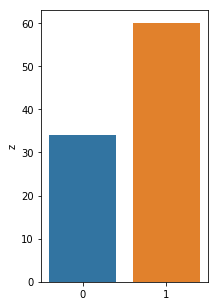

In [108]:
plt.figure(figsize=(3, 5))
#sns.barplot(x = [1,0],y=tar_c1)
#sns.barplot(x = [1,0],y=tre_c1)
sns.barplot(x = [1,0],y=z_c1)

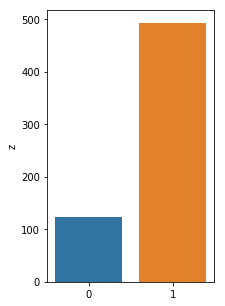

In [80]:
plt.figure(figsize=(3, 5))
#sns.barplot(x = [1,0],y=tar_b)
#sns.barplot(x = [0,1],y=tre_b)
sns.barplot(x = [1,0],y=z_b)

In [36]:
# First Stangart BeamSearch
tar_st = df[(df['i2'] > -0.633) & (df['i2'] < -0.14)  & (df['i3'] < -0.85) & (df['n3'] >-0.257) & (df['n3'] < 0.26)].target.value_counts()
tre_st = df[(df['i2'] > -0.633) & (df['i2'] < -0.14)  & (df['i3'] < -0.85) & (df['n3'] >-0.257) & (df['n3'] < 0.26)].treat.value_counts()
z_st = df[(df['i2'] > -0.633) & (df['i2'] < -0.14)  & (df['i3'] < -0.85) & (df['n3'] >-0.257) & (df['n3'] < 0.26)].z.value_counts()



In [48]:
z_st

1.0    42
0.0     4
Name: z, dtype: int64

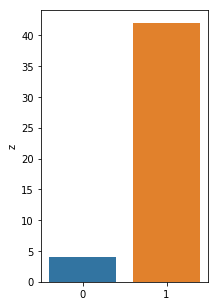

In [46]:
plt.figure(figsize=(3, 5))
#sns.barplot(x = [0,1],y=tar_st)
#sns.barplot(x = [0,1],y=tre_st)
sns.barplot(x = [1,0],y=z_st)

In [22]:
tar_w =  df[(df['n7'] > 0.239) & (df['n7']<0.854)].target.value_counts()
tre_w =  df[(df['n7'] > 0.239) & (df['n7']<0.854)].treat.value_counts()
z_w =  df[(df['n7'] > 0.239) & (df['n7']<0.854)].z.value_counts()

In [30]:
z_w

1.0    1621
0.0     381
Name: z, dtype: int64

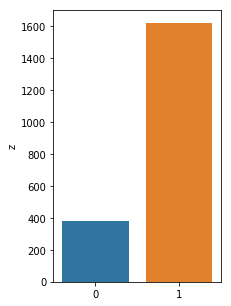

In [31]:
plt.figure(figsize=(3, 5))
#sns.barplot(x = [1,0],y=tar_w)
#sns.barplot(x = [1,0],y=tre_w)
sns.barplot(x = [1,0],y=z_w)

In [81]:
#Binominal first
df[(df['n5'] >0.83) & (df['n3'] > -0.26) & (df['n3'] < 0.27) & (df['i1']>0.85)].z.value_counts()

1.0    69
0.0    14
Name: z, dtype: int64

In [75]:
#ChiSquared first
df[(df['n3'] > 0.26) & (df['n3'] < 0.83) & (df['n3'] > 0.27) & (df['n3'] < 0.87) & (df['i2']>0.81)].treat.value_counts()

1.0    259
0.0    138
Name: treat, dtype: int64

In [82]:
# First Stangart SimpleDFS
tar = df[(df['i3'] > 0.735) & (df['i2'] < 0.633)  & (df['i1'] > 0.22) & (df['i1'] < 0.9)].target.value_counts()
tre = df[(df['i3'] > 0.735) & (df['i2'] < 0.633)  & (df['i1'] > 0.22) & (df['i1'] < 0.9)].treat.value_counts()
z = df[(df['i3'] > 0.735) & (df['i2'] < 0.633)  & (df['i1'] > 0.22) & (df['i1'] < 0.9)].z.value_counts()

In [132]:
z = z.sort_values()

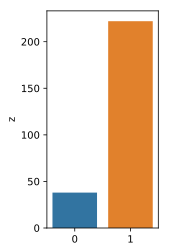

In [165]:
plt.figure(figsize=(2, 4))
#sns.barplot(x = [0,1],y=tar)
#sns.barplot(x = [0,1],y=tre)
sns.barplot(x = [0,1],y=z)

In [135]:
df_stand = pd.DataFrame(list(zip(tar,tre,z)),columns = ['target','treatment','z'])

In [159]:
df_stand

,target,treatment,z
0,229,209,38
1,31,51,222


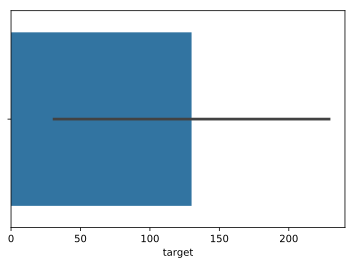

In [161]:
sns.barplot(df_stand['t)

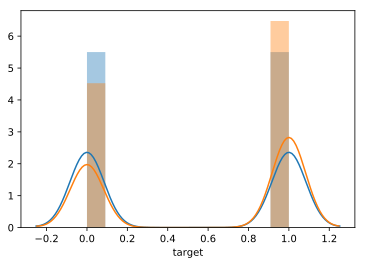

In [158]:
sns.distplot(df['treat'])
#sns.distplot(df['z'])
sns.distplot(df['target'])

In [44]:
df['treat'].value_counts()

0.0    5000
1.0    5000
Name: treat, dtype: int64

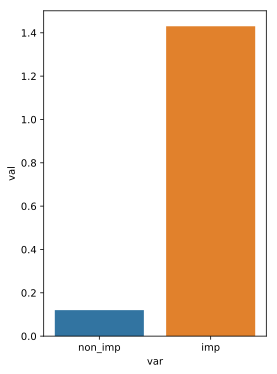

In [30]:
plt.figure(figsize=(4, 6))
sns.barplot(x = 'var', y = 'val', data = im)

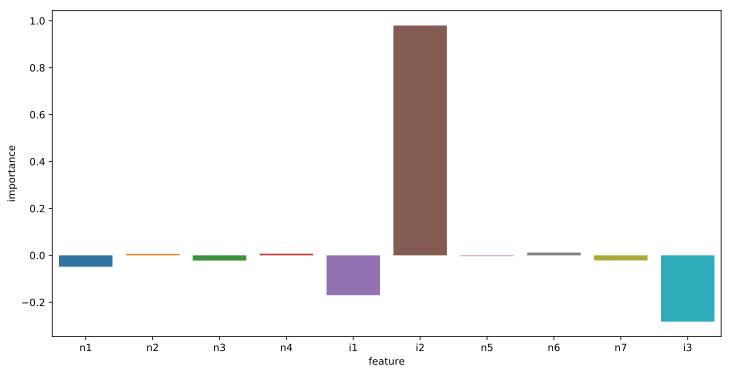

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x = 'feature',y='importance',data= df_coef)

In [188]:
df.treat.value_counts()

0.0    5000
1.0    5000
Name: treat, dtype: int64

In [144]:
df[df['i2']>0.81].z.value_counts()

0    1762
1     283
Name: z, dtype: int64